# Credit Card Fraud Detection

This notebook implements a credit card fraud detection project based on [this Kaggle project](https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python). The dataset used for the project is available [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and more information is given about this dataset below.

### Import of the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


## Dataset analysis

The dataset contains transactions made by credit cards in September 2013 by European cardholders. It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data cannot be provided.

### Loading the dataset

We start by loading the dataset with pandas. The information showed below allow us to see that there is a total of 284807 elements in the dataset, each having 30 features (V1 to V28, time and amount being respectively the components extracted with PCA, the seconds elapsed between each transaction and the first transaction in the dataset and the amount paid with the considered transaction) and a class indicator.

In [6]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 Among the transactions, only 492 are fradulous.

In [7]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


## Training a model

We need to split the data into a train and test set.

In [10]:
from sklearn.model_selection import train_test_split

feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
data_features = df[feature_names]
data_target = df[target]

X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


For training, we use the LogisticRegression function which is a classification algorithm used to model the probability of a binary outcome.
The parameters of the function that can influence the training are:
- penalty (default: l2): how the model is penalized
    - L1: based on absolute value of the model coefficients. Better with a high amount of components where some might be useless
    - L2: based on the square sum of the coefficients. Better to avoid overfitting by not completely removing the useless components.
    - elasticnet: L1+L2

- c (default=1): inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

- solver ({'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'): algorithm to use in the optimization problem. To choose a solver, you might want to consider the following aspects:
    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones; 
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 
    - 'liblinear' is limited to one-versus-rest schemes. 
    - 'newton-cholesky' is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

- max_iter (default=100): the max amount of training iterations




In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

c:\Users\donyt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction on test set

After training, we can test our model on the test set. After prediction, we show the confusion matrix which represent the good and bad classifications of the model.

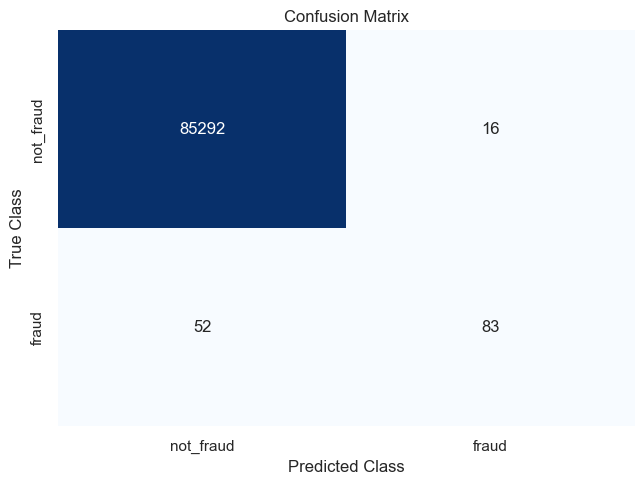

In [40]:
pred = model.predict(X_test)
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [41]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.61
F1 Score for Logistic Regression Model 1 : 0.71
